In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Dataset used is the top 10 car makes by volume
Initial data wraggling done using Alteryx and SQLite
~2.4 million instances of available used car inventory from market check

In [2]:
df = pd.read_csv('Desktop/GT/car_data_top_10.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
weird = (df.applymap(type) != df.iloc[0].apply(type)).any(axis=1)
df[weird]

,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,vehicle_type_ss,...,dom_is,dom_180_is,msrp_fs,dom_active_is,is_certified_is,fuel_type_ss,scraped_at_dts,status_date_dts,city_ss,state_ss
0,00000433-1e18-46f5-befa-cb338ff4c44c,4T1BF1FK8CU553915,12997,68475,UCJ2478,2012,Toyota,Camry,L,Car,...,36,36,12997,36,0,Regular Unleaded,2018-08-22T16:25:51Z,2018-09-23T18:43:48Z,Pineville,MO
1,00000847-d723-47ed-9dd6-e1d70088e35a,1C4RJEJT9EC221337,25942,70897,P32069,2014,Jeep,Grand Cherokee,Summit,SUV,...,131,97,25942,97,0,Flex-Fuel,2018-08-29T20:41:30Z,2018-09-23T22:08:26Z,Houston,TX
2,00000d32-faef-4643-b0e1-b5d91ef47c6a,1HGCP3F85BA018516,10488,91599,H42760A,2011,Honda,Accord,EX-L V-6,Car,...,64,64,12578,64,0,Regular Unleaded,2018-09-20T07:11:32Z,2018-09-24T01:34:40Z,Norwood,MA
3,00000ff5-58ae-4ce0-9b41-651d9e85b478,1FTEW1CP8GFB91564,29997,44394,D190109A,2016,Ford,F-150,XLT,Truck,...,220,24,29997,24,0,Regular Unleaded,2018-09-02T04:11:09Z,2018-09-23T21:15:07Z,Murrieta,CA
4,0000120b-8653-495d-9c6e-b1d80996bed7,1FMEU17L63LA06903,4990,173058,3LA06903,2003,Ford,Expedition,Eddie Bauer,SUV,...,46,46,4990,46,0,Regular Unleaded,2018-08-09T11:12:42Z,2018-09-23T17:48:19Z,Raleigh,NC
5,000022e8-a0b6-4883-a15a-3186a92894f9,KNMAT2MV2FP521153,17000,34327,OVE009,2015,Nissan,Rogue,SV,SUV,...,23,23,18779,23,0,Regular Unleaded,2018-08-31T18:57:05Z,2018-09-23T19:51:30Z,Laconia,NH
6,00003682-9694-43a0-a1d0-0ff791073420,2T1CG22P9YC315542,1950,238071,A-16875,2000,Toyota,Camry Solara,SE,Car,...,9,9,1995,9,0,Regular Unleaded,2018-09-14T11:15:24Z,2018-09-23T16:22:41Z,Rock Hill,SC
7,00004765-88b2-48d9-abf5-ec6bb84adafd,5TFUW5F1XDX271996,24223,92176,S4142C,2013,Toyota,Tundra,Tundra FFV,Truck,...,174,26,24223,26,0,Flex-Fuel,2018-09-13T10:30:11Z,2018-09-23T11:52:44Z,Macon,GA
8,00005452-1e87-42bd-a812-97d6b687f8c0,1GCVKREC9FZ412526,29499,33049,13469A,2015,Chevrolet,Silverado 1500,LT,Truck,...,35,35,32995,35,0,Flex-Fuel,2018-08-25T20:17:52Z,2018-09-23T21:15:06Z,Escanaba,MI
9,000060a6-cc23-49bb-96ac-2c4fbcf50c29,5TFAZ5CN4HX031379,31790,7220,833445A,2017,Toyota,Tacoma,TRD Sport,SUV,...,96,5,31790,5,0,Regular Unleaded,2018-09-20T14:47:54Z,2018-09-23T12:10:30Z,San Antonio,TX


In [4]:
df.head()

,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,vehicle_type_ss,...,dom_is,dom_180_is,msrp_fs,dom_active_is,is_certified_is,fuel_type_ss,scraped_at_dts,status_date_dts,city_ss,state_ss
0,00000433-1e18-46f5-befa-cb338ff4c44c,4T1BF1FK8CU553915,12997,68475,UCJ2478,2012,Toyota,Camry,L,Car,...,36,36,12997,36,0,Regular Unleaded,2018-08-22T16:25:51Z,2018-09-23T18:43:48Z,Pineville,MO
1,00000847-d723-47ed-9dd6-e1d70088e35a,1C4RJEJT9EC221337,25942,70897,P32069,2014,Jeep,Grand Cherokee,Summit,SUV,...,131,97,25942,97,0,Flex-Fuel,2018-08-29T20:41:30Z,2018-09-23T22:08:26Z,Houston,TX
2,00000d32-faef-4643-b0e1-b5d91ef47c6a,1HGCP3F85BA018516,10488,91599,H42760A,2011,Honda,Accord,EX-L V-6,Car,...,64,64,12578,64,0,Regular Unleaded,2018-09-20T07:11:32Z,2018-09-24T01:34:40Z,Norwood,MA
3,00000ff5-58ae-4ce0-9b41-651d9e85b478,1FTEW1CP8GFB91564,29997,44394,D190109A,2016,Ford,F-150,XLT,Truck,...,220,24,29997,24,0,Regular Unleaded,2018-09-02T04:11:09Z,2018-09-23T21:15:07Z,Murrieta,CA
4,0000120b-8653-495d-9c6e-b1d80996bed7,1FMEU17L63LA06903,4990,173058,3LA06903,2003,Ford,Expedition,Eddie Bauer,SUV,...,46,46,4990,46,0,Regular Unleaded,2018-08-09T11:12:42Z,2018-09-23T17:48:19Z,Raleigh,NC


In [5]:
list(df.columns)

['id',
 'vin_ss',
 'price_fs',
 'miles_fs',
 'stock_no_ss',
 'year_is',
 'make_ss',
 'model_ss',
 'trim_ss',
 'vehicle_type_ss',
 'body_type_ss',
 'drivetrain_ss',
 'engine_ss',
 'engine_size_ss',
 'transmission_ss',
 'doors_is',
 'cylinders_is',
 'interior_color_ss',
 'exterior_color_ss',
 'zip_is',
 'dom_is',
 'dom_180_is',
 'msrp_fs',
 'dom_active_is',
 'is_certified_is',
 'fuel_type_ss',
 'scraped_at_dts',
 'status_date_dts',
 'city_ss',
 'state_ss']

In [6]:
print(df.shape)

(2417454, 30)


Other than year, make, model and trim looks like engine size has high positive corelation with price

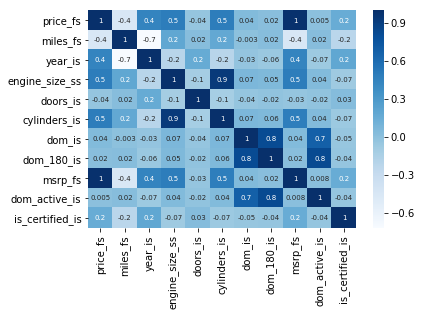

In [7]:
corr = df.corr(method='pearson')
sns.heatmap(corr, annot = True, fmt =".1g", annot_kws={"size": 7}, cmap = "Blues")

In [8]:
df.corr().loc[:,'price_fs'].abs().sort_values(ascending=False)[1:]

msrp_fs           0.992
engine_size_ss    0.497
cylinders_is      0.492
year_is           0.447
miles_fs          0.446
is_certified_is   0.158
dom_is            0.042
doors_is          0.035
dom_180_is        0.017
dom_active_is     0.005
Name: price_fs, dtype: float64

In [9]:
df['price_fs'].describe()

count   2417454.000
mean      21190.205
std       10503.700
min        1195.000
25%       14084.000
50%       18995.000
75%       26995.000
max      999917.000
Name: price_fs, dtype: float64

Newer the car, higher the price

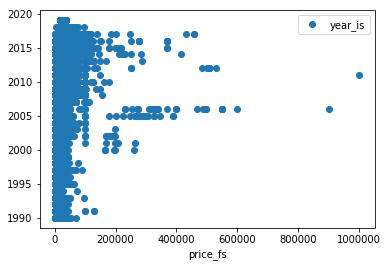

In [10]:
df.plot(x='price_fs', y='year_is', style='o')

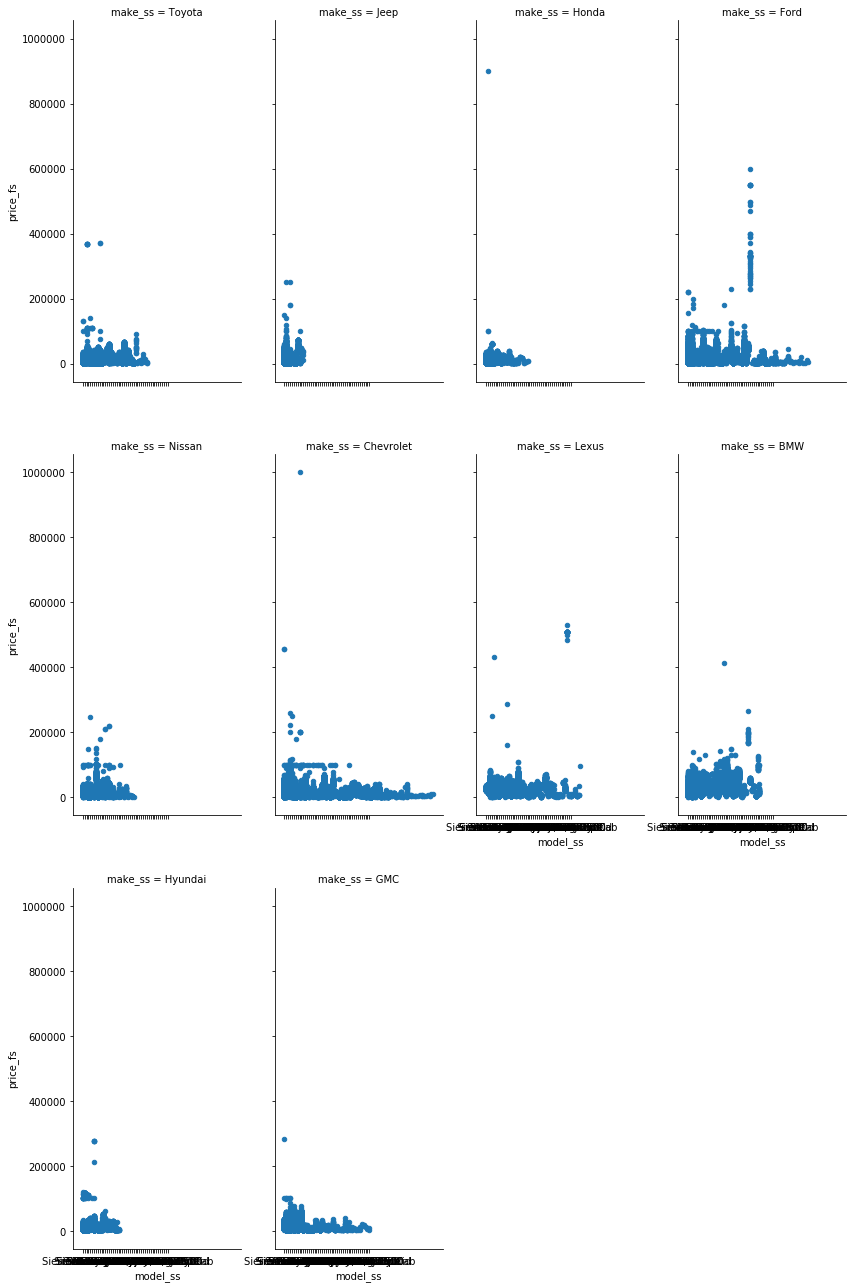

In [11]:
(df
 .pipe(sns.FacetGrid, 
       col='make_ss', 
       col_wrap=4, 
       aspect=.5, 
       size=6)
 .map(plt.scatter, 'model_ss', 'price_fs', s=20)
 .fig.subplots_adjust(wspace=.2, hspace=.2)
)

Chevrolet and Ford are the most popular used cars available

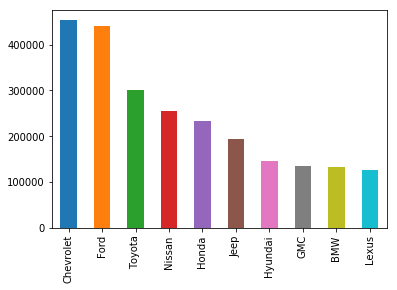

In [12]:
df['make_ss'].value_counts().plot(kind='bar')

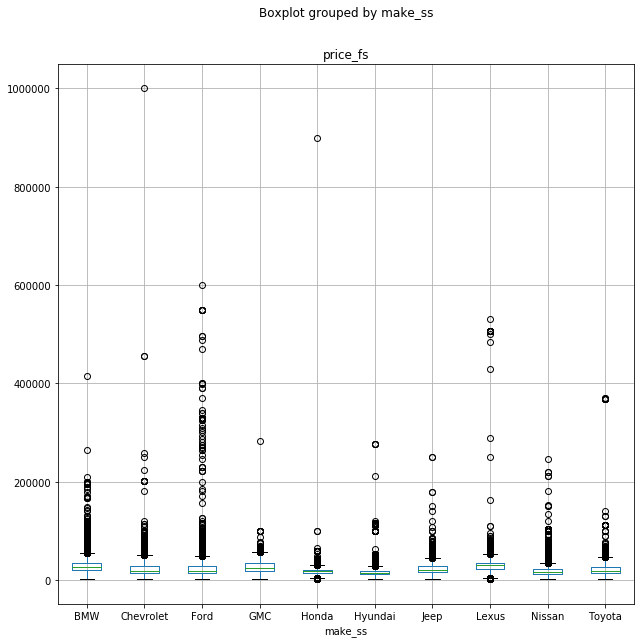

In [13]:
df.boxplot(column="price_fs", by="make_ss", figsize=(10,10))

Used Random Forest Regressor model with 6 features to predict price (80/20 train test split)

In [14]:
y = df.price_fs

In [16]:
X = df[['miles_fs', 'year_is', 'engine_size_ss', 'make_ss', 'model_ss', 'trim_ss']]
X = pd.get_dummies(data=X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X)

         miles_fs  year_is  engine_size_ss  make_ss_BMW  make_ss_Chevrolet  \
0           68475     2012           2.500            0                  0   
1           70897     2014           5.700            0                  0   
2           91599     2011           3.500            0                  0   
3           44394     2016           2.700            0                  0   
4          173058     2003           5.400            0                  0   
5           34327     2015           2.500            0                  0   
6          238071     2000           2.200            0                  0   
7           92176     2013           5.700            0                  0   
8           33049     2015           5.300            0                  1   
9            7220     2017           3.600            0                  0   
10          62370     2015           3.700            0                  0   
11          96178     2014           2.000            0         

In [19]:
rf = RandomForestRegressor()

In [20]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
y_pred = rf.predict(X_test)

In [23]:
explained_variance_score(y_pred, y_test)

0.9547996090115404